# Quantum Circuit Simulation with Runtime Analysis
For this task, we had implement a statevector simulator for quantum circuits from scratch. The goal is to demystify how to simulate a quantum computer and to demonstrate familiarity with quantum circuits.

## 2. Advanced simulation using tensor multiplication


In [15]:
#Import necessary libraries
import numpy as np
import time
import matplotlib.pyplot as plt


First, we define the single-qubit gates (Pauli-X, Hadamard, and Identity) and the CNOT gate for two qubits, as we did for naive simulation.

In [16]:
# Define single-qubit gates
X = np.array([[0, 1],              [1, 0]])  # Pauli-X gate
H = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],              
              [1/np.sqrt(2), -1/np.sqrt(2)]])  # Hadamard gate
I = np.eye(2)  # Identity gate

# Define CNOT gate for two qubits
CNOT_matrix = np.array([[1, 0, 0, 0],
                        [0, 1, 0, 0], 
                        [0, 0, 0, 1],
                        [0, 0, 1, 0]])  # CNOT gate


Next, we define functions to apply the single-qubit gates using tensor multiplication. ( for this task, I am not implementing for 2 qubit gates)

In [33]:
import numpy as np

def apply_single_qubit_gate(state_tensor, gate, qubit_index):
    num_qubits=len(state_tensor.shape)
    # Move the axis of the qubit to apply the gate to the front (0-th axis)
    reshaped_tensor = np.moveaxis(state_tensor, qubit_index, 0)

    # Apply the single-qubit gate using tensor multiplication
    new_state = np.tensordot(gate, reshaped_tensor, axes=1)

    # Restore the qubit axis order by moving it back to the original position
    return np.moveaxis(new_state, 0, qubit_index)


The apply_single_qubit_gate uses np.tensordot to apply the quantum gates to the state tensor along the corresponding qubit axes.

We also need a function to initialize the state tensor for n qubits.

In [34]:
def initialize_state_tensor(num_qubits):
    state_tensor = np.zeros((2,) * num_qubits)
    state_tensor[(0,) * num_qubits] = 1
    return state_tensor

The initialize_state_tensor function creates an n-dimensional tensor with all entries as 0 except the first entry, representing the |000...0> state.

Now, we define the function to simulate the quantum circuit using tensor multiplication.

In [35]:
# Function to simulate the quantum circuit with tensor multiplication
def simulate_quantum_circuit(num_qubits):
    state_tensor = initialize_state_tensor(num_qubits)
    for i in range(num_qubits):
        state_tensor = apply_single_qubit_gate(state_tensor, H, i)
        state_tensor = apply_single_qubit_gate(state_tensor,X,i)
    return state_tensor


This function initializes the state tensor and applies the Hadamard and Pauli-X gates sequentially to the qubits using tensor multiplication.

We measure the runtime required to apply the quantum circuit to different numbers of qubits.

In [42]:
# Measure runtime for different number of qubits
qubit_range = list(range(1,25))  # From 1 to 11 qubits
runtimes = []

for n in qubit_range:
    start_time = time.time()
    simulate_quantum_circuit(n)
    end_time = time.time()
    runtimes.append(end_time - start_time)


We use the time module to measure the runtime for applying the circuit to various numbers of qubits. The start_time and end_time are used to calculate the runtime for each qubit size.

Finally, we plot the runtime as a function of the number of qubits.

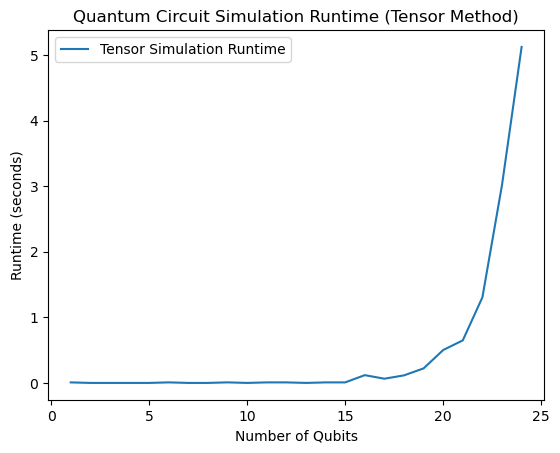

In [43]:
# Plot runtime as a function of number of qubits
plt.plot(qubit_range, runtimes, label="Tensor Simulation Runtime")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Quantum Circuit Simulation Runtime (Tensor Method)")
plt.legend()
plt.show()

### Analysis of Results obtained from Naive Simulation and Tensor Simulation

Tensor multiplication proves to be significantly more efficient than traditional matrix dot multiplication. Using dot multiplication, I managed to simulate up to 10 qubits. However, tensor multiplication allowed me to handle 25 qubits—over twice the amount possible with dot multiplication. In terms of runtime, it naturally increases as the number of qubits rises. Nevertheless, the runtime for tensor multiplication remains much faster compared to dot multiplication.